In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sns
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_versions()
import anndata as ad
# sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

In [2]:
sub = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total6_subsample.h5ad')

In [4]:
res = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_filtered.h5ad')

In [2]:
# st_adata = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/Dataset1/apart/st/st_12.h5ad')
sc_adata = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_healthy.h5ad')

In [4]:
sc_adata.obs['study']

TAAGCGTTCACTCCT_GRO-11_biopsy             Nawijn_2021
CGCAACTCAACGGGA_GRO-03_biopsy             Nawijn_2021
ACTGCGCACTCTGTC_GRO-10_biopsy             Nawijn_2021
TGCCCATAGCGTTGCC_GRO-10_biopsy            Nawijn_2021
CATTCGCTCTCTTAT_GRO-10_biopsy             Nawijn_2021
                                             ...     
TTTGGTTGTAATGCGG-1-WSSS_A_LNG8757929-1     niche_2022
TTTGGTTGTGCCCTTT-1-WSSS_A_LNG8757929-1     niche_2022
TTTGGTTTCAAGAGTA-1-WSSS_A_LNG8757929-1     niche_2022
TTTGTTGAGCGAGTCA-1-WSSS_A_LNG8757929-1     niche_2022
TTTGTTGTCTTCTGGC-1-WSSS_A_LNG8757929-1     niche_2022
Name: study, Length: 438392, dtype: category
Categories (7, object): ['Arun_C_Habermann_2020', 'Chan_Zuckerberg_2020', 'Kadur_Lakshminarasimha_2022', 'Marie_Deprez_2019', 'Nawijn_2021', 'Peng_He_2022', 'niche_2022']

In [3]:
sc_adata.var_names_make_unique()
sc_adata.obs_names_make_unique()


st_adata.var_names_make_unique()
st_adata.obs_names_make_unique()

# filter genes to be the same on the spatial data


In [4]:
import numpy as np
intersect = np.intersect1d(sc_adata.var_names, st_adata.var_names)

In [10]:
sc_adata[:, intersect].copy()

AnnData object with n_obs × n_vars = 438392 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'ann_finest_level_colors'
    obsm: 'X_pca', 'X_umap'

In [11]:
sc_adata

AnnData object with n_obs × n_vars = 438392 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'ann_finest_level_colors'
    obsm: 'X_pca', 'X_umap'

In [12]:
df = sc_adata.to_df()

In [18]:
print(np.max(sc_adata.X))
print(np.min(sc_adata.X))
print(np.all(np.isfinite(df)))
print(np.min(df.sum(1)))

26361.0
0.0
True
8.0


In [13]:
import numpy as np
# df[df < 0].dropna(how = 'all')
# df[df == -np.inf].dropna(how = 'all')

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ZNF229,C17orf78,DHRS11,ACACA,MRM1,AC159540.2,MRPL45,PCDH20,PAGR1,ADORA3


In [90]:
df.loc[(df!=0).any(1)]

/tmp/ipykernel_267278/3609920111.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df.loc[(df!=0).any(1)]


,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ZNF229,C17orf78,DHRS11,ACACA,MRM1,AC159540.2,MRPL45,PCDH20,PAGR1,ADORA3
TAAGCGTTCACTCCT_GRO-11_biopsy,0.000000,0.0,1.147117,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CGCAACTCAACGGGA_GRO-03_biopsy,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.362467
ACTGCGCACTCTGTC_GRO-10_biopsy,1.158509,0.0,1.680896,1.158509,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
TGCCCATAGCGTTGCC_GRO-10_biopsy,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
CATTCGCTCTCTTAT_GRO-10_biopsy,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.424553,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTAATGCGG-1-WSSS_A_LNG8757929-1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
TTTGGTTGTGCCCTTT-1-WSSS_A_LNG8757929-1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.000000
TTTGGTTTCAAGAGTA-1-WSSS_A_LNG8757929-1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
TTTGTTGAGCGAGTCA-1-WSSS_A_LNG8757929-1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
sc.pp.filter_genes(res, min_counts=10)

res.layers["counts"] = res.X.copy()
sc.pp.highly_variable_genes(
    res,
    n_top_genes=2000,
    subset=True,
    layer="counts",
    flavor="seurat_v3"
)

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [ ]:
sc.pp.normalize_total(res, target_sum=10e4)
sc.pp.log1p(res)

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


In [63]:
df = res.to_df()

In [75]:
import numpy as np
df[df == -np.inf].dropna(how = 'all')

,CFH,CFTR,HS3ST1,AOC1,TMEM176A,MTMR7,PDK4,ZMYND10,ST7,SLC4A1,...,LINC00551,CCL23,CCL4,CCL18,FCGBP,CCL15,CCL4L2,CCL14,CCL3,ACACA


In [1]:
import scvi
from scvi.model import CondSCVI, DestVI

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Global seed set to 0
/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_

In [82]:
CondSCVI.setup_anndata(res, layer="counts", labels_key='cell_type')

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scvi/data/fields/_layer_field.py:91: UserWarning: adata.layers[counts] does not contain unnormalized count data. Are you sure this is what you want?
  warnings.warn(
/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scvi/data/_utils.py:168: UserWarning: Category 11 in adata.obs['_scvi_labels'] has fewer than 3 cells. Models may not train properly.
  warnings.warn(


In [83]:
sc_model = CondSCVI(res, weight_obs=True)

In [62]:
res

AnnData object with n_obs × n_vars = 438392 × 2000
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch', '_scvi_labels'
    var: 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'ann_finest_level_colors', 'hvg', 'log1p', '_scvi_uuid', '_scvi_manager_uuid'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'

In [84]:
sc_model.train(max_epochs=300,lr=0.0001)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 1/300:   0%|          | 0/300 [00:00<?, ?it/s]

ValueError: Expected parameter loc (Tensor of shape (128, 5)) of distribution Normal(loc: torch.Size([128, 5]), scale: torch.Size([128, 5])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan]], grad_fn=<AddmmBackward0>)

In [35]:
res.obs['cell_type'].dropna()

TAAGCGTTCACTCCT_GRO-11_biopsy                B cells
CGCAACTCAACGGGA_GRO-03_biopsy             Mast cells
ACTGCGCACTCTGTC_GRO-10_biopsy             Suprabasal
TGCCCATAGCGTTGCC_GRO-10_biopsy            Suprabasal
CATTCGCTCTCTTAT_GRO-10_biopsy             Suprabasal
                                             ...    
TTTGGTTGTAATGCGG-1-WSSS_A_LNG8757929-1    SMG mucous
TTTGGTTGTGCCCTTT-1-WSSS_A_LNG8757929-1    SMG mucous
TTTGGTTTCAAGAGTA-1-WSSS_A_LNG8757929-1    SMG mucous
TTTGTTGAGCGAGTCA-1-WSSS_A_LNG8757929-1    SMG mucous
TTTGTTGTCTTCTGGC-1-WSSS_A_LNG8757929-1    SMG mucous
Name: cell_type, Length: 438392, dtype: category
Categories (51, object): ['Basal resting', 'Suprabasal', 'Deuterosomal', 'Multiciliated (nasal)', ..., 'Interstitial Mφ perivascular', 'Classical monocytes', 'Non-classical monocytes', 'Mast cells']

In [33]:
df[df<0].dropna()

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999


In [32]:
df.isnull().any(axis=0).unique()

array([False])

In [8]:
res.obs['cell_type'] = res.obs['ann_finest_level']
del res.obs['ann_finest_level']

In [9]:
list(res.obs['condition'].unique())

['nan',
 'carcinoid',
 'healthy',
 'non-small cell lung cancer',
 'had TB as a child (fully treated over 30+ years)',
 'worsening respiratory function prior to arrest',
 'COVID+',
 'IPF',
 'NSIP',
 'cHP',
 'ILD',
 'Sarcoidosis']

In [10]:
cancer = res[(res.obs['condition']=='healthy') | (res.obs['condition']=='non-small cell lung cancer')]

In [11]:
healthy = res[(res.obs['condition']=='healthy')]

In [12]:
healthy

View of AnnData object with n_obs × n_vars = 438392 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'ann_finest_level_colors'
    obsm: 'X_pca', 'X_umap'

In [14]:
cancer

View of AnnData object with n_obs × n_vars = 534666 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'ann_finest_level_colors'
    obsm: 'X_pca', 'X_umap'

In [15]:
healthy.write_h5ad('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_healthy.h5ad')

In [16]:
cancer.write_h5ad('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_cancer.h5ad')

In [4]:
adata = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_healthy.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 438392 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'ann_finest_level_colors'
    obsm: 'X_pca', 'X_umap'

In [8]:
for i in ['gene_ids-new', 'feature_types-new', 'gene_ids-new-ref-ref-ref', 'mito-new-ref-ref-ref', 'ribo-new-ref-ref-ref', 'sarscov2-new-ref-ref-ref', 'n_cells-ref-ref-ref-ref-ref-ref-ref', 'highly_variable-ref-ref-ref-ref-ref-ref-ref', 'means-ref-ref-ref-ref-ref-ref-ref', 'dispersions-ref-ref-ref-ref-ref-ref-ref', 'feature_is_filtered-ref-ref-ref-ref-ref-ref-ref', 'feature_name-ref-ref-ref-ref-ref-ref-ref', 'feature_reference-ref-ref-ref-ref-ref-ref-ref', 'feature_biotype-ref-ref-ref-ref-ref-ref-ref']:
    del res.var[i]

In [10]:
res.obs_names_make_unique()
res.var_names_make_unique()

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/anndata/utils.py:111: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['ACTTCGCCAACACACT-1-1', 'CTGTGAATCCGTAGGC-1-1', 'GGGTCACAGGAGGCAG-1-1', 'CTCATGCGTGAAGCTG-1-1', 'CACTGGGAGTCGCCCA-1-1']
  warnings.warn(


In [12]:
res.write('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res.h5ad')

In [39]:
adata.obs['study']

D372                                      Barbry_Leroy_2020
                                               Krasnow_2020
D353                                      Barbry_Leroy_2020
D354                                      Barbry_Leroy_2020
D367                                      Barbry_Leroy_2020
                                                ...        
TTTGGTTGTAATGCGG-1-WSSS_A_LNG8757929-1           niche_2022
TTTGGTTGTGCCCTTT-1-WSSS_A_LNG8757929-1           niche_2022
TTTGGTTTCAAGAGTA-1-WSSS_A_LNG8757929-1           niche_2022
TTTGTTGAGCGAGTCA-1-WSSS_A_LNG8757929-1           niche_2022
TTTGTTGTCTTCTGGC-1-WSSS_A_LNG8757929-1           niche_2022
Name: study, Length: 951423, dtype: category
Categories (17, object): ['Arun_C_Habermann_2020', 'Banovich_Kropski_2020', 'Barbry_Leroy_2020', 'Chan_Zuckerberg_2020', ..., 'Peng_He_2022', 'Seibold_2020', 'Teichmann_Meyer_2019', 'niche_2022']

In [25]:
adata2 = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total6_filtered.h5ad')

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [26]:
adata2.obs_names

Index(['D372_Biop_Int2_CTGTTTAAGTCTTGCA-1-34', 'P2_8_TGCCCATTCGGATGGA',
       'D353_Brus_Dis1_GCGCGATGTCATGCCG-1-19',
       'D354_Brus_Dis1_GGGCACTGTCCTAGCG-1-22',
       'D367_Biop_Pro1_TGTGTTTAGTTCCACA-1-28', 'P3_2_TCGTAGAAGACGCAAC',
       'D353_Biop_Pro1TTCTCAAGTCTAACGT-1-17',
       'D344_Brus_Dis1_TCGCGAGCACAAGACG-1-14', 'ATTTCTGTCAGTGTTG_T120',
       'D339_Biop_Int1_AGAGTGGAGCCGATTT-1-9',
       ...
       'TTTGGTTTCTCTCTAA-1', 'TTTGTTGAGGTGATAT-1', 'TTTGTTGAGTCACGCC-1',
       'TTTGTTGCACATTCGA-1', 'TTTGTTGCACCAGCCA-1', 'TTTGTTGCAGGACGAT-1',
       'TTTGTTGCATCGTTCC-1-1', 'TTTGTTGGTCTATGAC-1', 'TTTGTTGTCAGACATC-1',
       'TTTGTTGTCGGAAACG-1'],
      dtype='object', length=758315)

In [9]:
# adata_ref = sc.read( '/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/' + total_before + '.h5ad')
adata_ref = sc.read( '/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total_rna_filtered.h5ad')

# index = []
# for i in range(0,len(list(adata_ref.obs_names))) :
#     index.append(adata_ref.obs_names[i][0:-4])
# adata_ref.obs_names = index
# # print(adata_ref.obs_names)

adata = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/Dataset1/sc_filtered.h5ad')
# adata.obs_names_make_unique()
# adata.var_names_make_unique()



In [8]:
adata_ref

AnnData object with n_obs × n_vars = 371250 × 28024
    obs: 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'sample', 'study', 'donor_id', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'size_factors', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entrop

In [13]:
var_names = adata_ref.var_names.intersection(adata.var_names)

In [14]:
var_names

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'ZNF229', 'C17orf78', 'DHRS11', 'ACACA', 'MRM1', 'AC159540.2', 'MRPL45',
       'PCDH20', 'PAGR1', 'ADORA3'],
      dtype='object', length=16678)

In [12]:
adata_ref.var_names = adata_ref.var['feature_name']

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/anndata/_core/anndata.py:895: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [18]:
adata_ref.write('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total_rna_droped.h5ad')

In [24]:
drop = set(adata_ref.obs_keys()).difference(adata.obs_keys())

In [30]:
drop.remove('ann_finest_level')

In [36]:
adata

AnnData object with n_obs × n_vars = 71752 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

In [32]:
for i in drop:
    del adata_ref.obs[i]

In [37]:
adata_ref.write('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total_rna_droped.h5ad')

In [38]:
adata_ref.obs_names

Index(['D372_Biop_Int2_CTGTTTAAGTCTTGCA-1-34', 'P2_8_TGCCCATTCGGATGGA',
       'D353_Brus_Dis1_GCGCGATGTCATGCCG-1-19',
       'D354_Brus_Dis1_GGGCACTGTCCTAGCG-1-22',
       'D367_Biop_Pro1_TGTGTTTAGTTCCACA-1-28', 'P3_2_TCGTAGAAGACGCAAC',
       'D353_Biop_Pro1TTCTCAAGTCTAACGT-1-17',
       'D344_Brus_Dis1_TCGCGAGCACAAGACG-1-14', 'ATTTCTGTCAGTGTTG_T120',
       'D339_Biop_Int1_AGAGTGGAGCCGATTT-1-9',
       ...
       'CCCTCCTCAGCATGAG_F02611', 'AGCGGCACCCGATA-SC31',
       'GTTCGGGGTCAAAGAT_F01394', 'CTTGGCTGTTCGTTGA_HD68',
       'GAAACTCCAGTAACGG-SC155', 'CTCGGAGAGCTCAACT_SC10',
       'TGGCTGGGTTCAGTAC_F01851', 'GCCAAATGTCTCACCT_SC24',
       'CGGACACAGCCATCGC-1-HCATisStab7659970', 'ATGAGGGTCCCTCTCC_SC143'],
      dtype='object', length=371250)

In [ ]:
adata_ref = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total_rna_droped.h5ad')

In [3]:
orginal = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total_rna.h5ad')

In [4]:
orginal

AnnData object with n_obs × n_vars = 584884 × 28024
    obs: 'is_primary_data', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'tissue_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'sample', 'study', 'donor_id', 'smoking_status', 'BMI', 'condition', 'subject_type', 'sample_type', "3'_or_5'", 'sequencing_platform', 'cell_ranger_version', 'fresh_or_frozen', 'dataset', 'anatomical_region_level_2', 'anatomical_region_level_3', 'anatomical_region_highest_res', 'age', 'ann_highest_res', 'n_genes', 'size_factors', 'log10_total_counts', 'mito_frac', 'ribo_frac', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'scanvi_label', 'leiden_1', 'leiden_2', 'leiden_3', 'anatomical_region_ccf_score', 'entropy_study_leiden_3', 'entropy_dataset_leiden_3', 'entrop

In [6]:
adata = orginal.obs[['anatomical_region_level_2','anatomical_region_level_3']]
# 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5','ann_coarse_for_GWAS_and_modeling'

In [7]:
now = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_position.h5ad')

In [8]:
interaction = set(adata.index).intersection(now.obs_names)

In [9]:
len(interaction)

371251

In [10]:
for i in adata.columns:
    print(i)
    now.obs[i] = adata.loc[list(interaction),i]
    print(now)

anatomical_region_level_2
AnnData object with n_obs × n_vars = 951423 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'ann_finest_level', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_coarse_for_GWAS_and_modeling', 'anatomical_region_level_2'
    uns: 'ann_finest_level_colors'
    obsm: 'X_pca', 'X_umap'
anatomical_region_level_3
AnnData object with n_obs × n_vars = 951423 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'ann_finest_level', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'ann_coarse_for_GWAS_and_modeling', 'anatomical_region_level_2', 'anatomical_region_level_3'
    uns: 'ann_finest_l

In [15]:
list(now.obs['ann_finest_level'].unique())

['Suprabasal',
 'Alveolar macrophages',
 'Multiciliated (non-nasal)',
 'Basal resting',
 'CD4 T cells',
 'Neuroendocrine',
 'Classical monocytes',
 'B cells',
 'Monocyte-derived Mφ',
 'EC aerocyte capillary',
 'NK cells',
 'Mast cells',
 'Alveolar fibroblasts',
 'Smooth muscle',
 'EC arterial',
 'AT2',
 'AT1',
 'Deuterosomal',
 'Plasmacytoid DCs',
 'Plasma cells',
 'Pericytes',
 'Interstitial Mφ perivascular',
 'DC2',
 'Non-classical monocytes',
 'CD8 T cells',
 'SMG mucous',
 'Ionocyte',
 'SMG duct',
 'DC1',
 'Adventitial fibroblasts',
 'Tuft',
 'Myofibroblasts',
 'Club (nasal)',
 'EC venous systemic',
 'Fibromyocytes',
 'Alveolar Mφ CCL3+',
 'Club (non-nasal)',
 'SMG serous (bronchial)',
 'Goblet (bronchial)',
 'Peribronchial fibroblasts',
 'Goblet (nasal)',
 'EC general capillary',
 'EC venous pulmonary',
 'Lymphatic EC mature',
 'Lymphatic EC differentiating',
 'T cells proliferating',
 'SMG serous (nasal)',
 'AT2 proliferating',
 'Migratory DCs',
 'Multiciliated (nasal)',
 'SM act

In [27]:
now.write_h5ad('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/res_position.h5ad')

In [35]:
adata_subset

View of AnnData object with n_obs × n_vars = 371251 × 16678
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    uns: 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'

In [9]:
cell_type = orginal.obs['cell_type'].unique()

In [14]:
list(cell_type)

['alveolar macrophage',
 'natural killer cell',
 'type II pneumocyte',
 'respiratory basal cell',
 'vein endothelial cell',
 'CD8-positive, alpha-beta T cell',
 'pulmonary artery endothelial cell',
 'bronchus fibroblast of lung',
 'CD4-positive, alpha-beta T cell',
 'type I pneumocyte',
 'ciliated columnar cell of tracheobronchial tree',
 'plasma cell',
 'nasal mucosa goblet cell',
 'club cell',
 'smooth muscle cell',
 'classical monocyte',
 'elicited macrophage',
 'tracheobronchial serous cell',
 'non-classical monocyte',
 'alveolar capillary type 1 endothelial cell',
 'fibroblast of lung',
 'endothelial cell of lymphatic vessel',
 'alveolar capillary type 2 endothelial cell',
 'tracheobronchial smooth muscle cell',
 'multi-ciliated epithelial cell',
 'bronchial goblet cell',
 'lung neuroendocrine cell',
 'CD1c-positive myeloid dendritic cell',
 'epithelial cell of lung',
 'conventional dendritic cell',
 'myofibroblast cell',
 'B cell',
 'mast cell',
 'lung macrophage',
 'mucus secret

In [5]:
adata

,original_ann_level_1,original_ann_level_2,original_ann_level_3
GCGACCATCCCTAACC_SC22,Immune,Myeloid,Macrophages
P2_1_GCGCAACCAGTTAACC,Immune,Lymphoid,Innate lymphoid cell NK
GCTCTGTAGTGCTGCC_SC27,Epithelial,Alveolar epithelium,AT2
P2_8_TTAGGACGTTCAGGCC,Immune,Myeloid,Macrophages
CTTGATTGTCAGTTTG_T164,Epithelial,Airway epithelium,Basal
...,...,...,...
ACCTTTACATTAACCG_T120,Epithelial,Airway epithelium,Basal
CATTATCTCCATGAAC_F01639,Immune,Myeloid,Dendritic cells
AGGCCGTGTGTGACCC-SC56,Epithelial,Alveolar epithelium,AT2
CGATGGCAGCAGGCTA-1-2,Epithelial,Airway epithelium,Secretory


In [34]:
adata_ref = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total1.h5ad')
index = []
for i in range(0,len(list(adata_ref.obs_names))) :
    index.append(adata_ref.obs_names[i][0:-4])
adata_ref.obs_names = index
# print(adata_ref.obs_names)

KeyboardInterrupt: 

In [ ]:
adata_ref

AnnData object with n_obs × n_vars = 443002 × 19584
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    var: 'n_cells-ref', 'highly_variable-ref', 'means-ref', 'dispersions-ref', 'feature_is_filtered-ref', 'feature_name-ref', 'feature_reference-ref', 'feature_biotype-ref'
    uns: 'batch_colors', 'cell_type_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
# stage1 = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/Dataset1/apart/sc/stage1.h5ad')
# stage2 = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/Dataset1/apart/sc/stage2.h5ad')
# stage3 = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/Dataset1/apart/sc/stage3.h5ad')
# adata = ad.concat([stage1, stage2, stage3])

adata = sc.read('/home/xuezhengyang/data6/02-deconv_1/Script/Data/bulk_dataset1/sc/all.h5ad')
adata.obs_names_make_unique()
adata.var_names_make_unique()

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
# for i in adata_ref.obs_names:
#     df = adata_ref[i].to_df()
#     adata_ref.obs['n_genes'][i] = df[df>0].dropna(axis=1).size

In [ ]:
# for i in adata_ref.obs_names:
#     # df = adata_ref[i].to_df()
#     print(adata_ref.obs['self_reported_ethnicity'][i])
#     if adata_ref.obs['self_reported_ethnicity'][i] == 'nan':
#         print(i)
#         adata_ref.obs['self_reported_ethnicity'][i] = 'unknown'

In [ ]:
adata.obs['donor_id'] = adata.obs['batch']

In [ ]:
adata.obs['donor_id'].unique()

['_TD1_', '_TD2_', '_TD3_', '_TD5_', '_TD6_', '_TD8_']
Categories (6, object): ['_TD1_', '_TD2_', '_TD3_', '_TD5_', '_TD6_', '_TD8_']

In [ ]:
for i in adata.obs_names:
    doner = adata[i].obs['donor_id']
    print(doner.item())

_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1_
_TD1

In [ ]:
adata.obs['donor_id'] = adata.obs['batch']
del adata.obs['batch']

adata.obs['sample'] = adata.obs['donor_id']
adata.obs['study'] = "Jie_Lei_2022"
adata.obs['smoking_status'] = "former"
adata.obs['condition'] = "non-small cell lung cancer"
adata.obs['fresh_or_frozen'] = "frozen"
adata.obs['age'] = 'nan'
adata.obs['n_genes'] = 1
adata.obs['disease'] = "Lung adenocarcinoma"

for i in adata.obs_names:
    doner = adata[i].obs['donor_id']
    if doner.item() in ['_TD2_','_TD3_','_TD8_']:
        adata.obs['sex'] = "male"
    else:
        adata.obs['sex'] = "female"

adata.obs['tissue'] = "outer edges"
adata.obs['self_reported_ethnicity'] = "Asian"
adata.obs['development_stage'] = "unknown"

In [ ]:
['sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch']

['sample',
 'study',
 'donor_id',
 'smoking_status',
 'condition',
 'fresh_or_frozen',
 'age',
 'n_genes',
 'cell_type',
 'disease',
 'sex',
 'tissue',
 'self_reported_ethnicity',
 'development_stage',
 'batch']

In [ ]:
# adata_ref.var_names = adata_ref.var['feature_name']

In [ ]:
# adata.var_names

In [ ]:
['cell-type','stage','ethnicity','condition','smoking status']

['cell-type', 'stage', 'ethnicity', 'condition', 'smoking status']

In [ ]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [ ]:
adata_ref

View of AnnData object with n_obs × n_vars = 443002 × 19584
    obs: 'sample', 'study', 'donor_id', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'cell_type', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'batch'
    var: 'n_cells-ref', 'highly_variable-ref', 'means-ref', 'dispersions-ref', 'feature_is_filtered-ref', 'feature_name-ref', 'feature_reference-ref', 'feature_biotype-ref'
    uns: 'batch_colors', 'cell_type_colors', 'neighbors', 'pca'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


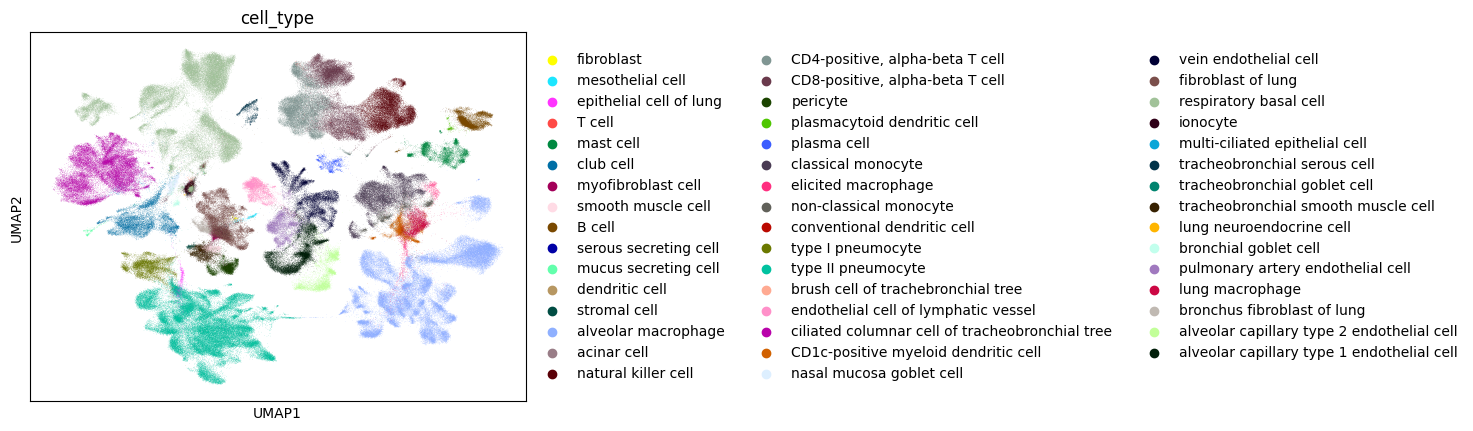

In [ ]:
sc.pl.umap(adata_ref, color='cell_type')

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
# sc.tl.umap(adata,method='leiden')

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scanpy/preprocessing/_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca
/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-03-15 14:28:20.509323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler f

In [ ]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
# sc.tl.umap(adata_ref)

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


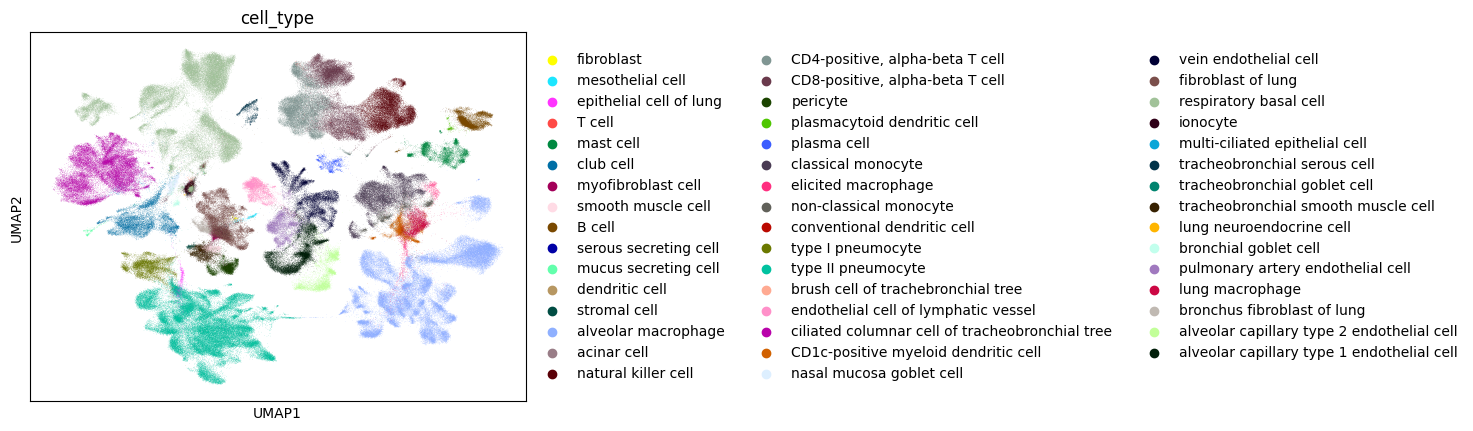

In [ ]:
sc.pl.umap(adata_ref, color='cell_type')

In [ ]:
adata_ref.uns['umap'] = {'params': {'a': 0.583030019901822, 'b': 1.3341669931033755}}

In [ ]:
sc.tl.ingest(adata, adata_ref, obs='cell_type')

In [ ]:
adata

AnnData object with n_obs × n_vars = 89537 × 19584
    obs: 'donor_id', 'sample', 'study', 'smoking_status', 'condition', 'fresh_or_frozen', 'age', 'n_genes', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_type'
    uns: 'pca', 'neighbors', 'cell_type_colors'
    obsm: 'X_pca', 'rep', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


KeyError: 'Could not find key bulk_labels in .var_names or .obs.columns.'

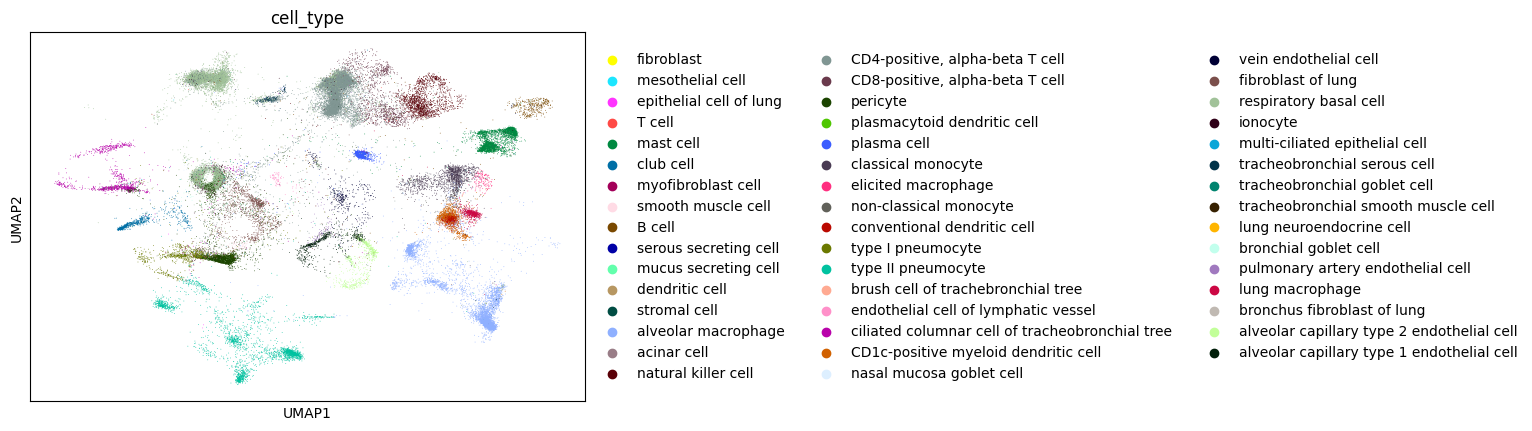

In [ ]:
sc.pl.umap(adata, color=['cell_type', 'bulk_labels'], wspace=0.5)

In [ ]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])

/home/xuezhengyang/.conda/envs/FYP/lib/python3.8/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [32]:
adata_concat.obs.cell_type = adata_concat.obs.cell_type.astype('category')
adata_concat.obs.cell_type.cat.reorder_categories(adata_ref.obs.cell_type.cat.categories, inplace=True)  # fix category ordering
# adata_concat.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix category colors

/tmp/ipykernel_2635063/872453799.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_concat.obs.cell_type.cat.reorder_categories(adata_ref.obs.cell_type.cat.categories, inplace=True)  # fix category ordering


In [40]:
adata_concat.obs['condition']

D372_Biop_Int2_CTGTTTAAGTCTTGCA-1-34-ref                 normal
P2_8_TGCCCATTCGGATGGA-ref                                normal
D353_Brus_Dis1_GCGCGATGTCATGCCG-1-19-ref                 normal
D354_Brus_Dis1_GGGCACTGTCCTAGCG-1-22-ref                 normal
D367_Biop_Pro1_TGTGTTTAGTTCCACA-1-28-ref                 normal
                                                   ...         
TTTGTTGTCATGCCAA-1-new                      Lung adenocarcinoma
TTTGTTGTCCCGAGGT-1-new                      Lung adenocarcinoma
TTTGTTGTCGCGCCAA-1-new                      Lung adenocarcinoma
TTTGTTGTCGTAGTGT-1-new                      Lung adenocarcinoma
TTTGTTGTCTGGTCAA-1-new                      Lung adenocarcinoma
Name: disease, Length: 532539, dtype: category
Categories (2, object): ['Lung adenocarcinoma', 'normal']

In [ ]:
adata_concat.write('/home/xuezhengyang/data6/02-deconv_1/Script/Data/SC/total2.h5ad')